# Exploratory Data Analysis on Sample Superstore Data
## By Luv Gupta

### TASK-

● As a business manager, try to find out the weak areas where you can work to make more profit. 

● What all business problems you can derive by exploring the data? 

In [420]:

# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [421]:
df=pd.read_csv("SampleSuperStore.csv")

In [422]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [423]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
               ... 
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, Length: 17, dtype: int64

In [424]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
               ... 
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, Length: 17, dtype: int64

In [425]:
df.shape

(9994, 13)

In [426]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
                ... 
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
Length: 13, dtype: int64

In [427]:
df.isna().sum()
#NO NULLS

Ship Mode       0
Segment         0
Country         0
City            0
State           0
               ..
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Length: 13, dtype: int64

In [428]:
#Treating duplicate data
print(df.duplicated().sum())
df=df.drop_duplicates()
print(df.duplicated().sum())

17
0


In [429]:
df['Profit%']=df.Profit/(df.Sales*(1+df.Discount)-df.Profit)*100
# We will use this profit% for further Visualizing

In [430]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820,42.857143


In [431]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Profit%
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013,31.356401
std,32058.266816,623.721409,2.226657,0.206455,234.45784,38.209127
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800,-60.439560
25%,23223.000000,17.300000,2.000000,0.000000,1.72620,6.666667
50%,55901.000000,54.816000,3.000000,0.200000,8.67100,35.211268
75%,90008.000000,209.970000,5.000000,0.200000,29.37200,49.253731
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600,100.000000


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
 13  Profit%       9977 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


# EXPLORATORY    DATA    ANALYSIS

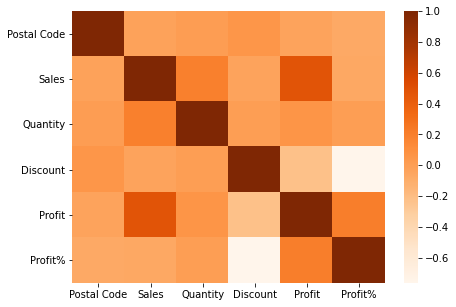

In [433]:
# Correlations between data
plt.figure(figsize=[7,5])
sb.heatmap(df.corr(), cmap = "Oranges");

# Univariate Exploration of Data

Mean Profit = 28.69012955798336


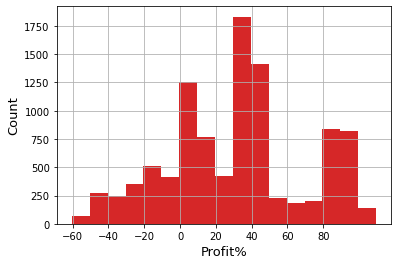

In [434]:
#DISTRIBUTION OF PROFIT%

bins=np.arange(df['Profit%'].min(), df['Profit%'].max()+10, 10) #binSize=25
plt.hist(data=df, x="Profit%", color=sb.color_palette()[3], bins=bins);
#plt.xlim((-150,200));
plt.xlabel("Profit%", size=13)
plt.ylabel("Count", size=13)
plt.xticks(np.arange(-60,100, 20))
plt.grid()
print("Mean Profit =",df.Profit.mean())

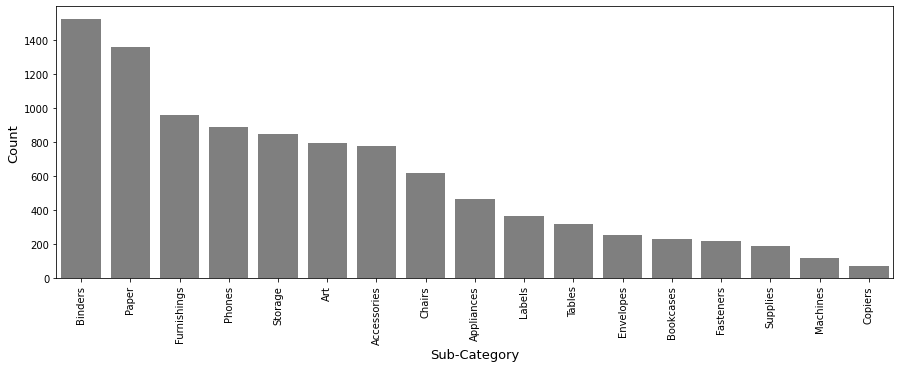

In [435]:
#Visualizing Sub-Cateogry Distribution

plt.figure(figsize=[15,5])
sb.countplot(data=df, x="Sub-Category", order=df['Sub-Category'].value_counts().index, color=sb.color_palette()[7])
plt.xticks(rotation=90)
plt.xlabel("Sub-Category", size=13);
plt.ylabel("Count", size=13);

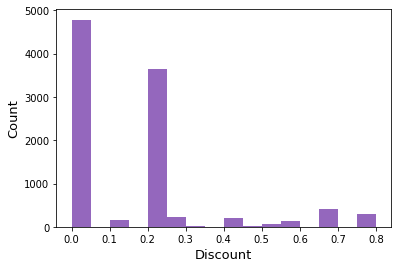

In [436]:
#Visualizing DISCOUNT Distribution
bins=np.arange(0, df.Discount.max()+0.05, 0.05) #binSize=25
plt.hist(data=df, x="Discount", bins=bins, color=sb.color_palette()[4]);
plt.xlabel("Discount", size=13)
plt.ylabel("Count", size=13);

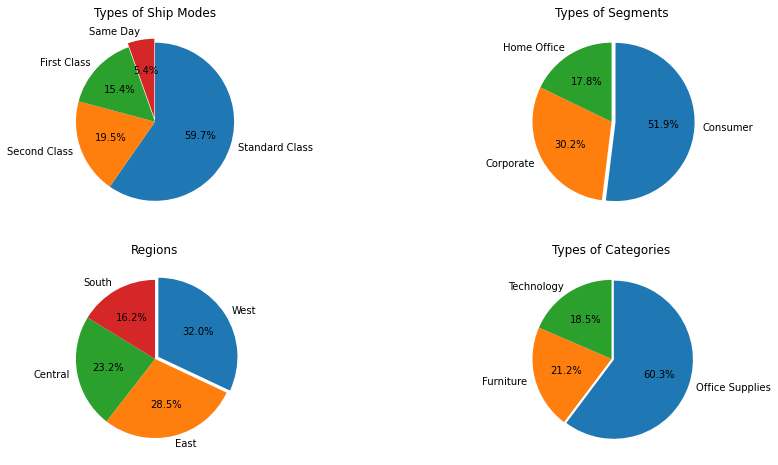

In [437]:
plt.figure(figsize=[15,8])

#SHIP MODES
plt.subplot(2,2,1)
order=df["Ship Mode"].value_counts()
plt.pie(order, labels= order.index, startangle=90, counterclock=False, autopct="%1.1f%%", explode=[0, 0, 0, 0.05]);
plt.title("Types of Ship Modes");

#SEGMENTS
plt.subplot(2,2,2)
order=df.Segment.value_counts()
plt.pie(order, labels= order.index, startangle=90, counterclock=False, autopct="%1.1f%%", explode=[.05, 0, 0]);
plt.title("Types of Segments");

#REGIONS
plt.subplot(2,2,3)
order=df["Region"].value_counts()
plt.pie(order, labels= order.index, startangle=90, counterclock=False, autopct="%1.1f%%", explode=[.05, 0, 0, 0]);
plt.title("Regions");

#CATEGORIES
plt.subplot(2,2,4)
order=df["Category"].value_counts()
plt.pie(order, labels= order.index, startangle=90, counterclock=False, autopct="%1.1f%%", explode=[.03, 0, 0]);
plt.title("Types of Categories");

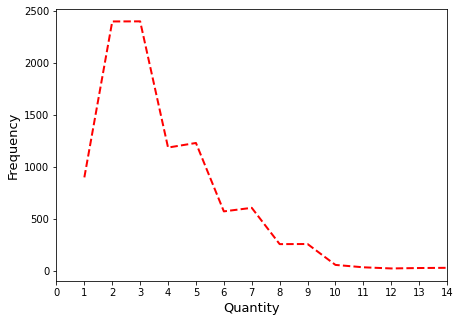

In [438]:
#QUANTITY DISTRIBUTION

x=df.Quantity.value_counts().reset_index().sort_values("index")
plt.figure(figsize=[7,5])
plt.plot(x['index'], x.Quantity, "r--",linewidth=2);
plt.xticks(np.arange(15));
plt.xlim(0,14);
plt.xlabel("Quantity", size=13);   
plt.ylabel("Frequency", size=13);   

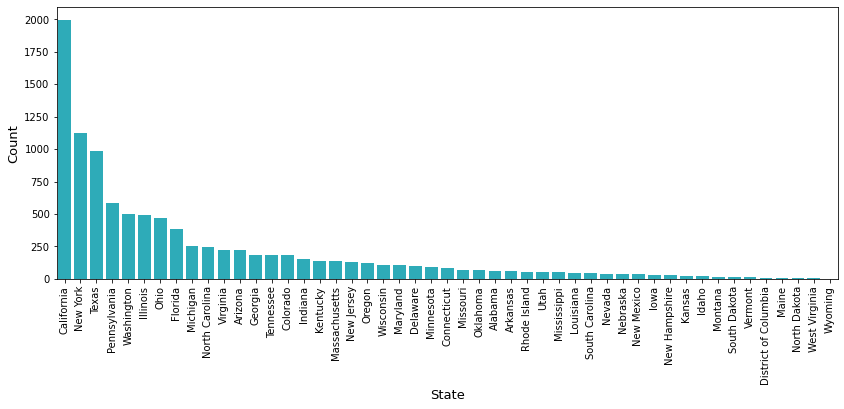

In [439]:
#STATES DISTRIBUTION

plt.figure(figsize=[14,5])
sb.countplot(data=df, x="State", order=df.State.value_counts().index, color=sb.color_palette()[9])
plt.xticks(rotation=90)
plt.xlabel("State", size=13);   
plt.ylabel("Count", size=13);   

# Bivariate Exploration of Data 

### Profit % Vs Discount

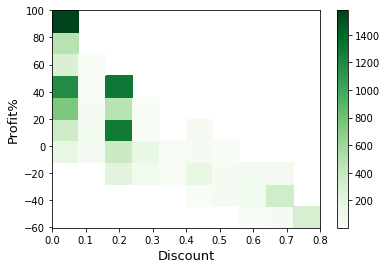

In [440]:
plt.hist2d(data=df, x="Discount", y="Profit%", cmin=0.5, cmap="Greens");
plt.colorbar();
plt.xlabel("Discount", size=13)
plt.ylabel("Profit%", size=13);

### Visualizing Profit% Vs States

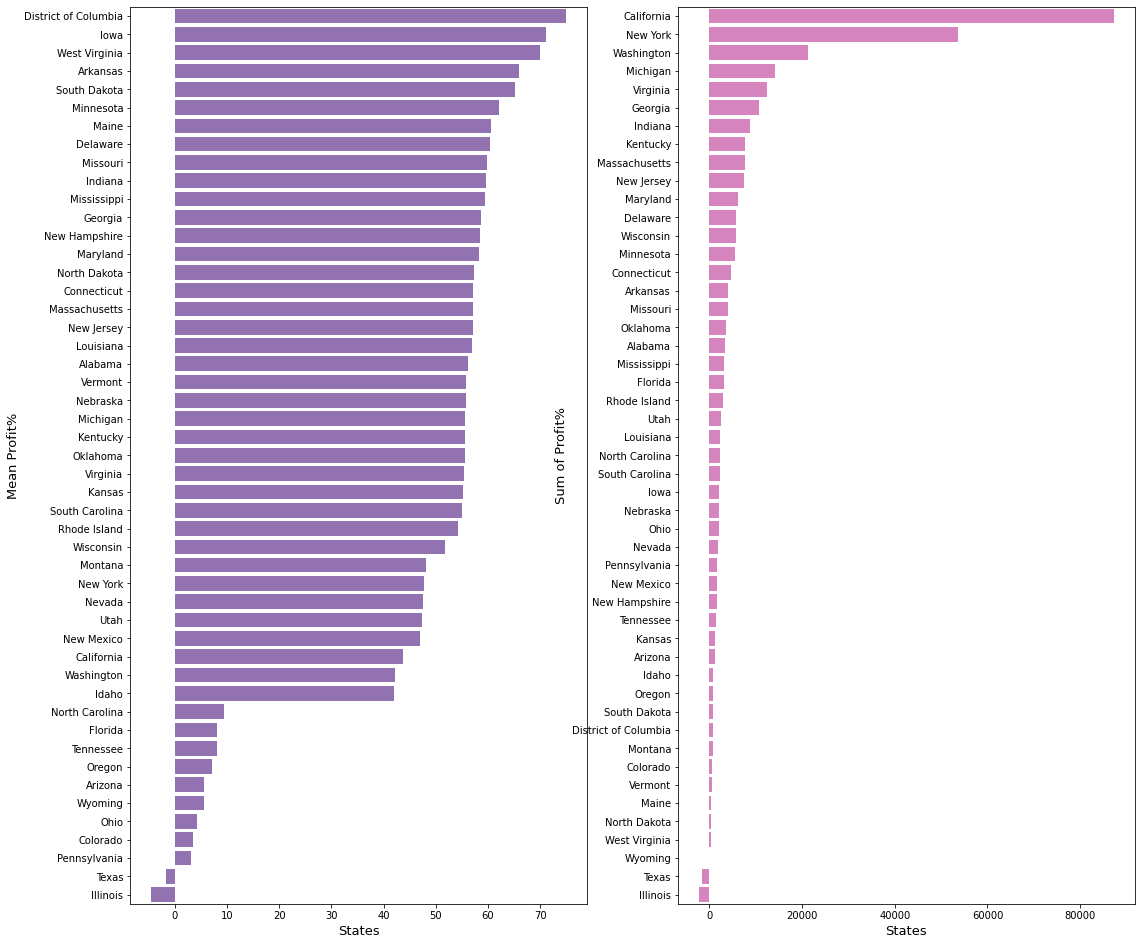

In [441]:
#MEAN PROFIT% VS SUM OF PROFIT%
plt.figure(figsize=[18,16.5])

plt.subplot(1,2,1)
x=df.groupby("State").mean()['Profit%'].reset_index()
x=x.sort_values("Profit%", ascending=False)
sb.barplot(data=x, y="State", x="Profit%", color=sb.color_palette()[4]);
#plt.xticks(rotation=80);
plt.ylabel("Mean Profit%", size=13);   
plt.xlabel("States", size=13); 

plt.subplot(1,2,2)
x=df.groupby("State").sum()['Profit%'].reset_index()
x=x.sort_values("Profit%", ascending=False)
sb.barplot(data=x, y="State", x="Profit%", color=sb.color_palette()[6]);
#plt.xticks(rotation=90);
plt.ylabel("Sum of Profit%", size=13);   
plt.xlabel("States", size=13); 

### Distributin of Profit% over Sales

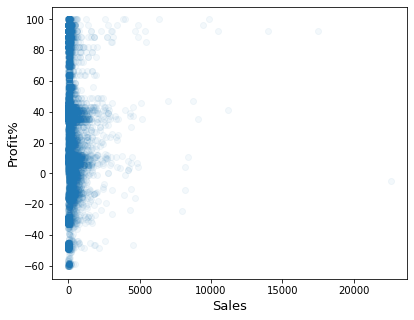

In [442]:
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
sb.regplot(data=df, x="Sales", y="Profit%", color=sb.color_palette()[0],scatter_kws={'alpha':.05},x_jitter=.02,fit_reg=False)
plt.xlabel("Sales", size=13)
plt.ylabel("Profit%", size=13);

### TOP 15 and WORST 15 Cities w.r.t MEAN PROFIT %

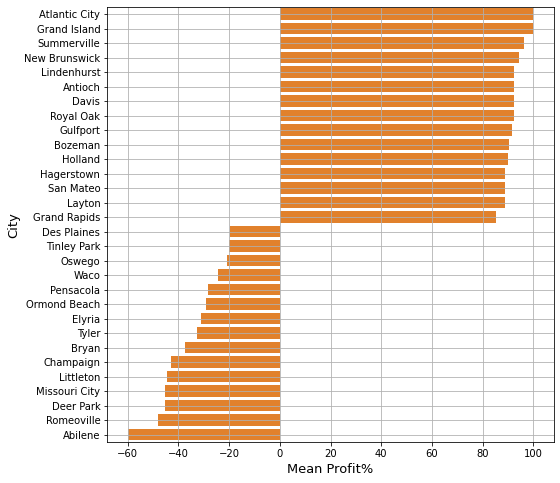

In [443]:
x=df.groupby("City").mean()['Profit%'].reset_index().sort_values("Profit%" , ascending=False)
y=x.head(15).append(x.tail(15))
plt.figure(figsize=[8,8])
sb.barplot(data=y, y="City", x="Profit%", color=sb.color_palette()[1]);
plt.xlabel("Mean Profit%", size=13)
plt.ylabel("City", size=13);
plt.grid()

### Mean-Profit% vs Sub-Categories

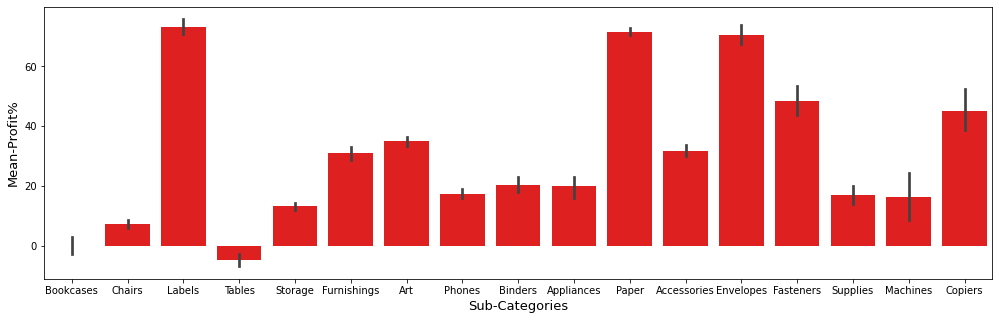

In [444]:
plt.figure(figsize=[17,5])
sb.barplot(data=df, x="Sub-Category", y="Profit%", color="red");
plt.xlabel("Sub-Categories", size=13)
plt.ylabel("Mean-Profit%", size=13);

### Segment vs Profit% (boxplot)

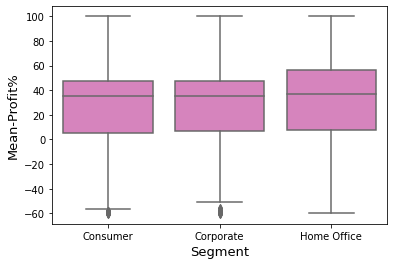

In [445]:
sb.boxplot(data=df, x="Segment", y="Profit%", color=sb.color_palette()[6])
plt.xlabel("Mean Profit%", size=13)
plt.xlabel("Segment", size=13)
plt.ylabel("Mean-Profit%", size=13);

### mean(Profit%) VS ( Quantity, Category, Discount, Region )

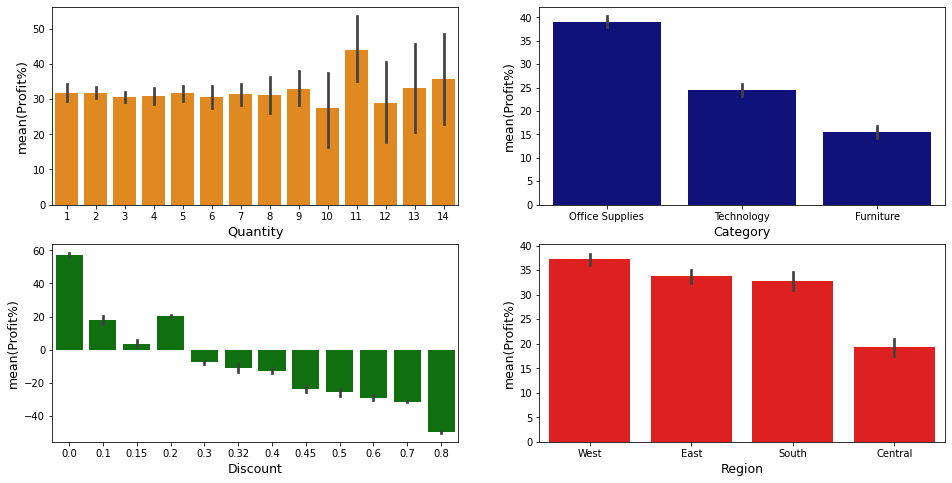

In [446]:
plt.figure(figsize=[16,8])
plt.subplot(2,2,1)
sb.barplot(data=df, x="Quantity", y="Profit%", color="darkorange");
plt.ylabel("mean(Profit%)", size=13)
plt.xlabel("Quantity", size=13)

plt.subplot(2,2,2)
sb.barplot(data=df, x="Category", y="Profit%", color="darkblue", order=["Office Supplies", "Technology", "Furniture"]);
plt.ylabel("mean(Profit%)", size=12.5)
plt.xlabel("Category", size=12.5)

plt.subplot(2,2,3)
sb.barplot(data=df, x="Discount", y="Profit%", color="green");
plt.ylabel("mean(Profit%)", size=12.5)
plt.xlabel("Discount", size=12.5)

plt.subplot(2,2,4)
sb.barplot(data=df, x="Region", y="Profit%", color="red", order=["West", "East", "South", "Central"]);
plt.ylabel("mean(Profit%)", size=12.5)
plt.xlabel("Region", size=12.5);

### Region vs Profit%

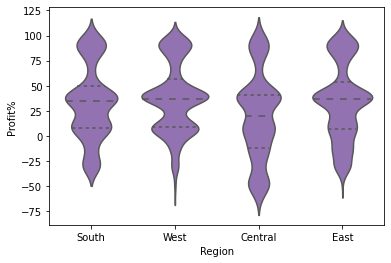

In [447]:
sb.violinplot(data=df, x="Region", y="Profit%", inner ='quartile' ,color=sb.color_palette()[4]);

### Ship- Mode  vs Profit% (Faceted-Plot)

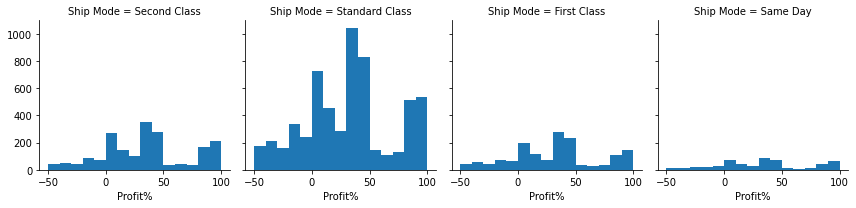

In [448]:
bins=np.arange(-50, 100+10, 10)
g=sb.FacetGrid(data=df, col="Ship Mode")
g.map(plt.hist, "Profit%", bins=bins);

# Multivariate Exploration of data (2 or more variables)

### Visualizing Category, Sales and Profit% 

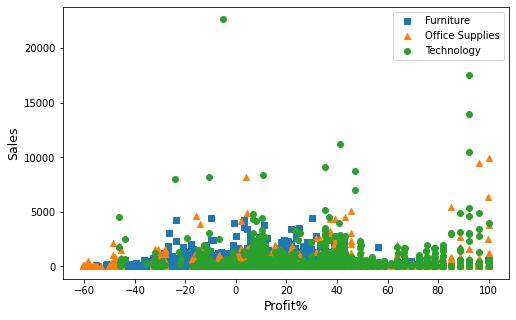

In [449]:
plt.figure(figsize=[8,5])
type_markers=[["Furniture", "s"], ["Office Supplies", "^"], ["Technology", "o"]]
for typee,marker in type_markers:
    plot=df[df["Category"]==typee]
    sb.regplot(data=plot, y='Sales', x="Profit%", marker=marker, fit_reg=False, scatter_kws={"alpha":1}, x_jitter=0.1)
plt.legend(["Furniture", "Office Supplies", "Technology"])
plt.xlabel("Profit%", size=12.5)
plt.ylabel("Sales", size=12.5);

### Sales vs Profit% vs Ship-Mode

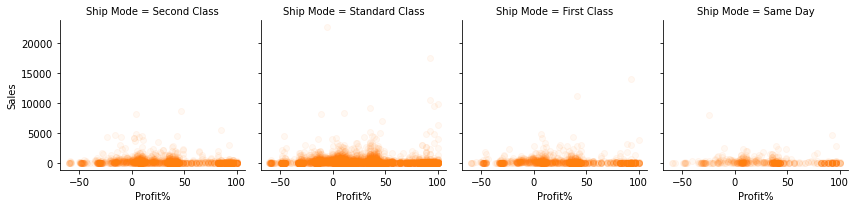

In [450]:
g=sb.FacetGrid(data=df, col="Ship Mode")
g.map(plt.scatter, "Profit%", "Sales", alpha=0.05, color=sb.color_palette()[1]); 

### Sales vs Profit% vs Region

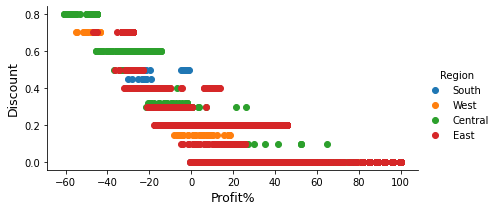

In [451]:
g=sb.FacetGrid(data=df, hue="Region", aspect=2)
g=g.map(sb.regplot, "Profit%", "Discount", fit_reg=False, x_jitter=0.4, scatter_kws={"alpha":1})
g.add_legend();
plt.xlabel("Profit%", size=12.5)
plt.ylabel("Discount", size=12.5);

### Ship Mode vs Profit% vs Category

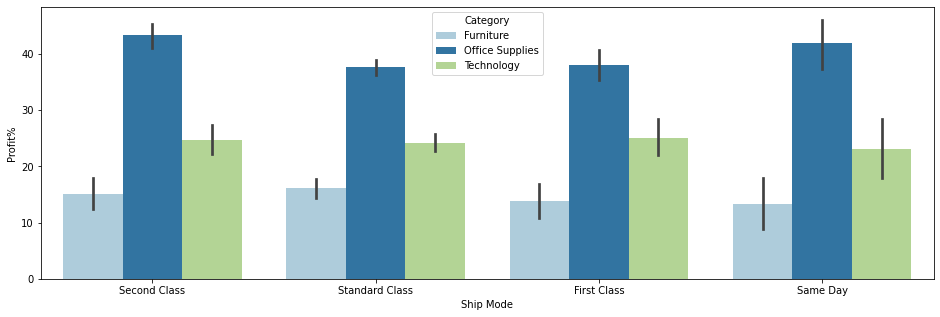

In [452]:
plt.figure(figsize=[16,5])
sb.barplot(data=df, x='Ship Mode',y="Profit%", hue='Category',palette='Paired');

### Segment vs Profit% vs Sub-Category

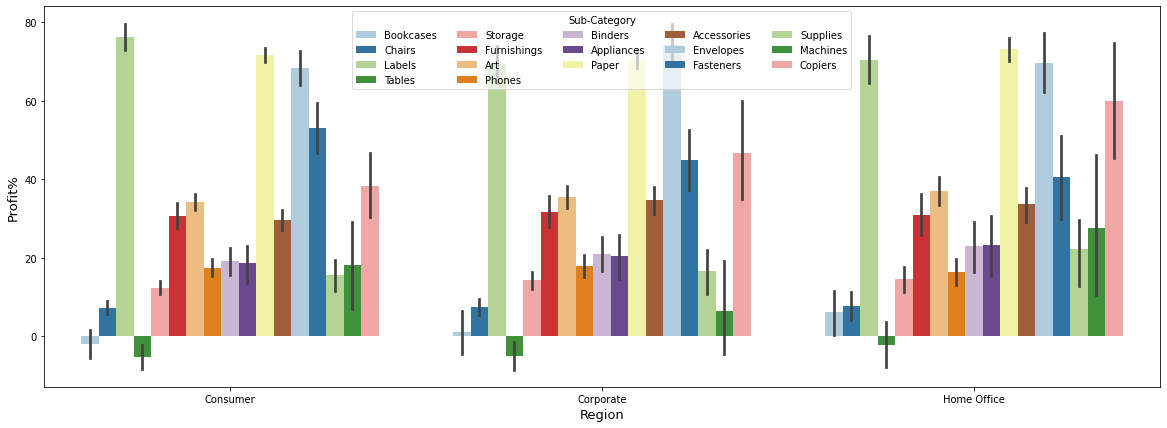

In [453]:
plt.figure(figsize=[20,7])
ax=sb.barplot(data=df, x='Segment', y="Profit%", hue='Sub-Category',palette='Paired' )
ax.legend(loc = 0, ncol = 5, framealpha = 0.7,title="Sub-Category");
plt.xlabel("Region", size=13)
plt.ylabel("Profit%", size=13);

### Sales vs Profit% vs Quantity

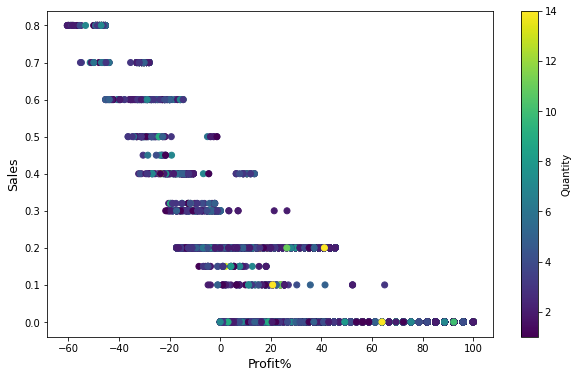

In [454]:
plt.figure(figsize=[10,6])
plt.scatter(data=df, y="Discount", x="Profit%", c="Quantity");
plt.colorbar(label="Quantity")
plt.xlabel("Profit%", size=12.5)
plt.ylabel("Sales", size=12.5);

# Conclusion:
1. California has the highest state distribution and so making most of the profit%(max sum of profit%)
2. Sales should be increased in District of Columbia (having highest mean Profit%) to make maximum Profit and should minimized in Texas and Illonis as they are the loss making States.
3. Increase in Discounts leads to decrease in profit%
4. Sales in Sub-Categories such as Labels, Paper and Copiers should be increased as they are making more profit %
5. Central Region shows decrease in mean Profit% as compared to other regions.
6. Office Supplies is the maximum Profit making Category on average and so sales in this category should be increased
7. Atlantic City and Green Islands are the cities having mean profit% equals 100.
8. Standard Class is the most common Ship-Mode type followed by Second Class and First Class


In [455]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,19.047619
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,42.857143
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,88.679245
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-21.621622
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10.344828


In [456]:
dfa=df

In [467]:
df=dfa

In [468]:
df=df.drop(columns=["Country", "City", "State", "Postal Code","Profit%","Sub-Category"])

In [469]:
df = pd.get_dummies(df, columns=["Segment"])

In [470]:
df = pd.get_dummies(df, columns=["Region"])

In [471]:
df = pd.get_dummies(df, columns=["Category"])

In [472]:
df = pd.get_dummies(df, columns=["Ship Mode"])

In [473]:
dfa["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [474]:
#replace_map_comp={'Ship Mode': {'Same Day':1,'First Class':2,'Second Class':3,'Standard Class':4}}
#df.replace(replace_map_comp, inplace=True)

In [475]:
pd.set_option('display.max_columns', None)
df.head()

,Sales,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,261.9600,2,0.00,41.9136,1,0,0,0,0,1,0,1,0,0,0,0,1,0
1,731.9400,3,0.00,219.5820,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,14.6200,2,0.00,6.8714,0,1,0,0,0,0,1,0,1,0,0,0,1,0
3,957.5775,5,0.45,-383.0310,1,0,0,0,0,1,0,1,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [477]:
y=df["Profit"].values
X=df.drop(columns=["Profit"]).values

# Building Model

In [478]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Multi Linear Regression

In [497]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [500]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
pd.set_option('display.max_rows', 10)
(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([[ 2.86e+01,  2.22e+01],
       [ 6.17e+01,  3.55e+00],
       [ 2.16e+02,  3.94e+02],
       [-2.50e+00,  1.02e+01],
       [ 2.04e+00,  5.15e+01],
       [ 5.41e+01,  9.12e+00],
       [ 7.48e+01,  2.64e+01],
       [-7.29e+00,  2.32e+00],
       [ 4.17e+01,  1.17e+00],
       [-1.55e+02, -4.85e+00],
       [ 3.98e+01,  6.88e+00],
       [ 6.56e+01,  5.76e+01],
       [-1.28e+02, -2.01e+01],
       [ 8.21e+01,  0.00e+00],
       [-1.84e+01,  3.40e+00],
       [-7.06e+00,  3.56e+00],
       [ 2.97e+00,  1.24e+00],
       [ 2.43e+02,  4.27e+02],
       [ 3.67e+00,  2.15e+00],
       [ 2.29e+00,  1.12e+01],
       [-1.14e+01,  9.91e+00],
       [ 5.94e+00, -8.35e+00],
       [ 2.84e+01,  2.40e+01],
       [ 4.58e+02,  8.75e+02],
       [ 1.85e+01,  2.14e+01],
       [ 2.87e+01,  8.11e+00],
       [ 5.83e+01,  1.90e+02],
       [ 4.27e+01,  8.71e+00],
       [ 1.24e+00,  5.32e+00],
       [-1.30e+01,  7.78e+00],
       [-1.24e+02, -1.82e+02],
       [-5.47e+00,  1.03e+00],
       [

In [501]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3522990620418245

## Random Forest

In [502]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [494]:
y_pred = regressor.predict(X_test)

#np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2.02e+01  2.22e+01]
 [ 9.82e+00  3.55e+00]
 [ 3.75e+02  3.94e+02]
 [ 9.54e+00  1.02e+01]
 [ 4.67e+01  5.15e+01]
 [ 7.81e+00  9.12e+00]
 [ 4.66e+01  2.64e+01]
 [ 2.24e+00  2.32e+00]
 [ 9.60e-01  1.17e+00]
 [-4.75e+00 -4.85e+00]
 [ 8.09e+00  6.88e+00]
 [ 5.75e+01  5.76e+01]
 [-2.07e+01 -2.01e+01]
 [ 1.37e+01  0.00e+00]
 [ 3.49e+00  3.40e+00]
 [ 5.69e+00  3.56e+00]
 [ 1.20e+00  1.24e+00]
 [ 4.12e+02  4.27e+02]
 [ 1.94e+00  2.15e+00]
 [ 1.10e+01  1.12e+01]
 [ 9.85e+00  9.91e+00]
 [-6.46e+00 -8.35e+00]
 [ 2.28e+01  2.40e+01]
 [ 7.40e+02  8.75e+02]
 [ 1.76e+01  2.14e+01]
 [ 8.25e+00  8.11e+00]
 [ 1.31e+02  1.90e+02]
 [ 8.07e+00  8.71e+00]
 [ 5.36e+00  5.32e+00]
 [ 8.03e+00  7.78e+00]
 [-1.78e+02 -1.82e+02]
 [ 2.64e+00  1.03e+00]
 [ 1.96e+02  2.20e+02]
 [ 1.85e+01  2.08e+01]
 [ 5.84e+00  1.36e+00]
 [-1.09e+02 -9.93e+01]
 [ 7.68e+00  7.98e+00]
 [ 4.01e+02  3.74e+02]
 [-2.63e+02 -2.98e+02]
 [ 5.60e+00  5.64e+00]
 [ 1.15e+02  1.47e+02]
 [-1.52e+02 -1.32e+02]
 [-4.33e+00 -1.04e+01]
 [-1.32e+00

In [492]:
r2_score(y_test, y_pred)

0.963456525018265

In [493]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=10)
scores

array([0.85, 0.83, 0.79, 0.04, 0.75, 0.72, 0.48, 0.44, 0.7 , 0.92])

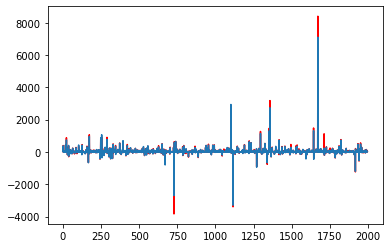

In [486]:
plt.plot(y_test, color="red")
plt.plot(y_pred)

## Decision Tree

In [409]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
reg.fit(X,y)

DecisionTreeRegressor()

In [380]:
y_pred = reg.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
np.set_printoptions(precision=2)

[[  9.09   9.09]
 [  5.26   5.26]
 [ 38.89  38.89]
 [ 72.41  72.41]
 [ 85.19  85.19]
 [ 75.44  75.44]
 [ 12.36  12.36]
 [ 78.57  78.57]
 [ 88.68  88.68]
 [-49.3  -49.3 ]
 [ 38.89  38.89]
 [ 56.25  56.25]
 [-30.14 -30.14]
 [  0.     0.  ]
 [ 17.07  17.07]
 [  7.87   7.87]
 [ 37.14  37.14]
 [ 38.89  38.89]
 [ 37.14  37.14]
 [ 38.89  38.89]
 [ 37.14  37.14]
 [-16.52 -16.52]
 [ 11.63  11.63]
 [ 35.21  35.21]
 [ 21.52  21.52]
 [ 85.19  85.19]
 [ 39.13  39.13]
 [ 88.68  88.68]
 [ 23.08  23.08]
 [ 35.21  35.21]
 [-42.86 -42.86]
 [  6.67   6.67]
 [ 85.19  85.19]
 [ 63.93  63.93]
 [  2.04   2.04]
 [-18.45 -18.45]
 [100.   100.  ]
 [ 35.14  35.14]
 [-13.33 -13.33]
 [ 43.28  43.28]
 [ 41.18  41.18]
 [-10.64 -10.64]
 [-14.29 -14.29]
 [ -1.03  -1.03]
 [ 41.18  41.18]
 [  6.67   6.67]
 [ 85.19  85.19]
 [ 35.21  35.21]
 [-30.14 -30.14]
 [ 41.18  41.18]
 [ 53.85  53.85]
 [ 42.86  42.86]
 [ 96.08  96.08]
 [ -3.03  -3.03]
 [ -1.09  -1.09]
 [ 40.85  40.85]
 [  8.7    8.7 ]
 [ -7.69  -7.69]
 [ 68.46  96.0

In [381]:
r2_score(y_test, y_pred)

0.9976477235708345

In [410]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=10)
scores

array([ 0.5 ,  0.7 ,  0.71, -0.16,  0.68,  0.81,  0.23,  0.2 ,  0.59,
        0.88])

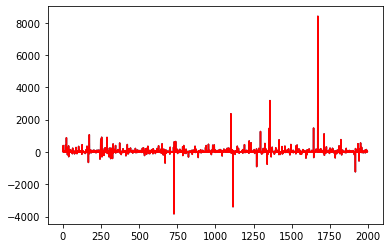

In [257]:
plt.plot(y_test)
plt.plot(y_pred, color="red")